# Metrics

## Imports

In [1]:
import numpy as np
np.random.seed(2021)
import random
random.seed(2021)

from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

## Create Toy Datasets

In [2]:
def pc(db):  # print count
    print("Database contains {} negative and {} positive samples".format(db.count(0), db.count(1)))

length = 100

# Balanced
db_balanced = [0] * (length//2) + [1] * (length//2)
pc(db_balanced)

# More positives
amount = random.uniform(0.9, 0.99)
db_positives = [1] * int(length*amount) + [0] * int(length*(1-amount)+1)
pc(db_positives)

# More negatives
amount = random.uniform(0.9, 0.99)
db_negatives = [0] * int(length*amount) + [1] * int(length*(1-amount)+1)
pc(db_negatives)

Database contains 50 negative and 50 positive samples
Database contains 3 negative and 97 positive samples
Database contains 97 negative and 3 positive samples


## Dummy model

In [3]:
top_no = 95
def dummy_model(data, threshold):
    correct=0
    output=[]
    for i, d in enumerate(data):
        if i < threshold or i > top_no :
            output.append(d)
            correct+=1
        else:
            output.append(abs(1-d))
    return output

### *Balanced dataset*

In [4]:
balanced_threshold = 80
out_balanced = dummy_model(db_balanced, balanced_threshold)

In [5]:
print('Labels:')
printmd('{}**{}**{}'.format(db_balanced[:balanced_threshold], db_balanced[balanced_threshold:top_no], db_balanced[top_no+1:],))
print('Predictions:')
printmd('{}**{}**{}'.format(out_balanced[:balanced_threshold], out_balanced[balanced_threshold:top_no], out_balanced[top_no+1:],))

Labels:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]**[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]**[1, 1, 1, 1]

Predictions:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]**[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]**[1, 1, 1, 1]

### *More positives*

In [6]:
positives_threshold = 80
out_positives = dummy_model(db_positives, positives_threshold)

In [7]:
print('Labels:')
printmd('{}**{}**{}'.format(db_positives[:positives_threshold], db_positives[positives_threshold:top_no], db_positives[top_no+1:]))
print('Predictions:')
printmd('{}**{}**{}'.format(out_positives[:positives_threshold], out_positives[positives_threshold:top_no], out_positives[top_no+1:]))

Labels:


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]**[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]**[1, 0, 0, 0]

Predictions:


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]**[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]**[1, 0, 0, 0]

### *More negatives*

In [8]:
negatives_threshold = 80
out_negatives = dummy_model(db_negatives, negatives_threshold)

In [9]:
print('Labels:')
printmd('{}**{}**{}'.format(db_negatives[:negatives_threshold], db_negatives[negatives_threshold:top_no], db_negatives[top_no+1:]))
print('Predictions:')
printmd('{}**{}**{}'.format(out_negatives[:negatives_threshold], out_negatives[negatives_threshold:top_no], db_negatives[top_no+1:]))

Labels:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]**[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]**[0, 1, 1, 1]

Predictions:


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]**[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]**[0, 1, 1, 1]

## Metrics

### **Accuracy**

Tasks:

* Create method implementing accuracy metric

*Balanced dataset*


In [10]:
from sklearn.metrics import accuracy_score

In [11]:
## Implement method implementing accuracy metric

def acc(labels, predictions):
    ## START
    assert len(labels)==len(predictions)
    acc = 0
    for i,l in enumerate(labels):
        if l==predictions[i]:
            acc+=1
    return acc/len(labels)
    ## END

In [12]:
printmd('Accuracy custom  {}'.format(acc(db_balanced, out_balanced)))
printmd('Accuracy sklearn {}'.format(accuracy_score(db_balanced, out_balanced)))

Accuracy custom  0.84

Accuracy sklearn 0.84

*More positives*

In [13]:
printmd('Accuracy custom  {}'.format(acc(db_positives, out_positives)))
printmd('Accuracy sklearn {}'.format(accuracy_score(db_positives, out_positives)))

Accuracy custom  0.84

Accuracy sklearn 0.84

*More negatives*

In [14]:
printmd('Accuracy custom  {}'.format(acc(db_negatives, out_negatives)))
printmd('Accuracy sklearn {}'.format(accuracy_score(db_negatives, out_negatives)))

Accuracy custom  0.84

Accuracy sklearn 0.84

*More positives - all positive predictions*

In [15]:
printmd('Accuracy {}'.format(accuracy_score(db_positives, np.ones(length))))

Accuracy 0.97

*More negatives - all negative predictions*

In [16]:
printmd('Accuracy {}'.format(accuracy_score(db_negatives, np.zeros(length))))

Accuracy 0.97

### **Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

*Balanced dataset*

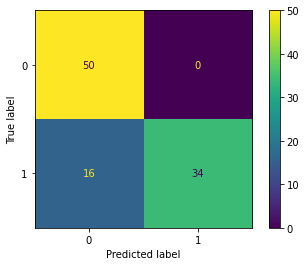

In [18]:
cmd = ConfusionMatrixDisplay(confusion_matrix(db_balanced, out_balanced), display_labels=[0,1])
cmd.plot()

*More positives*

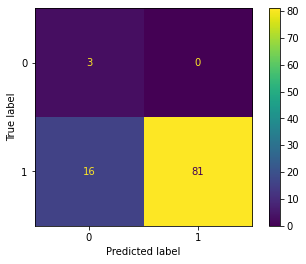

In [19]:
cmd = ConfusionMatrixDisplay(confusion_matrix(db_positives, out_positives), display_labels=[0,1])
cmd.plot()

*More negatives*

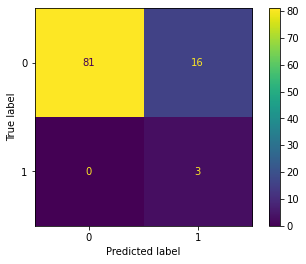

In [20]:
cmd = ConfusionMatrixDisplay(confusion_matrix(db_negatives, out_negatives), display_labels=[0,1])
cmd.plot()

*More positives - all positive predictions*

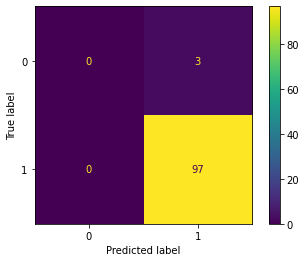

In [21]:
cmd = ConfusionMatrixDisplay(confusion_matrix(db_positives, np.ones(length)), display_labels=[0,1])
cmd.plot()

*More negatives - all negative predictions*

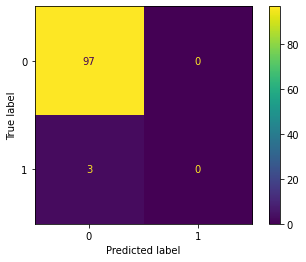

In [22]:
cmd = ConfusionMatrixDisplay(confusion_matrix(db_negatives, np.zeros(length)), display_labels=[0,1])
cmd.plot()

### **Precision**

Tasks:

* Create method implementing precision metric

In [23]:
from sklearn.metrics import precision_score

In [24]:
## Create method implementing precision metric

def precision(labels, predictions):
    ## START
    assert len(labels)==len(predictions)
    tp=0
    fp=0
    #precision=tp/(tp+fp)
    for i, p in enumerate(predictions):
        if p == labels[i] and p == 1:
            tp+=1
        elif p != labels[i] and p ==1:
            fp+=1
    if (tp+fp)==0:
        return 0
    return tp/(tp+fp)
    ## END

*Balanced dataset*

In [25]:
printmd('Precision custom  {}'.format(precision(db_balanced, out_balanced)))
printmd('Precision sklearn {}'.format(precision_score(db_balanced, out_balanced)))

Precision custom  1.0

Precision sklearn 1.0

*More positives*

In [26]:
printmd('Precision custom  {}'.format(precision(db_positives, out_positives)))
printmd('Precision sklearn {}'.format(precision_score(db_positives, out_positives)))

Precision custom  1.0

Precision sklearn 1.0

*More negatives*

In [27]:
printmd('Precision custom  {}'.format(precision(db_negatives, out_negatives)))
printmd('Precision sklearn {}'.format(precision_score(db_negatives, out_negatives)))

Precision custom  0.15789473684210525

Precision sklearn 0.15789473684210525

*More positives - all positive predictions*

In [28]:
printmd('Precision custom  {}'.format(precision(db_positives, np.ones(length))))
printmd('Precision sklearn {}'.format(precision_score(db_positives, np.ones(length))))

Precision custom  0.97

Precision sklearn 0.97

*More negatives - all negative predictions*

In [29]:
printmd('Precision custom  {}'.format(precision(db_negatives, np.zeros(length))))
printmd('Precision sklearn {}'.format(precision_score(db_negatives, np.zeros(length))))

Precision custom  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision sklearn 0.0

### **Recall**

Tasks:

* Create method implementing recall metric

In [30]:
from sklearn.metrics import recall_score

In [31]:
## Create method implementing recall metric

def recall(labels, predictions):
    ## START
    assert len(labels)==len(predictions)
    tp=0
    fn=0
    #recall=tp/(tp+fn)
    for i, p in enumerate(predictions):
        if p == labels[i] and p == 1:
            tp+=1
        elif p != labels[i] and p ==0:
            fn+=1
    if (tp+fn)==0:
        return 0
    return tp/(tp+fn)
    ## END

*Balanced dataset*

In [32]:
printmd('Recall custom  {}'.format(recall(db_balanced, out_balanced)))
printmd('Recall sklearn {}'.format(recall_score(db_balanced, out_balanced)))

Recall custom  0.68

Recall sklearn 0.68

*More positives*


In [33]:
printmd('Recall custom  {}'.format(recall(db_positives, out_positives)))
printmd('Recall sklearn {}'.format(recall_score(db_positives, out_positives)))

Recall custom  0.8350515463917526

Recall sklearn 0.8350515463917526

*More negatives*

In [34]:
printmd('Recall custom  {}'.format(recall(db_negatives, out_negatives)))
printmd('Recall sklearn {}'.format(recall_score(db_negatives, out_negatives)))

Recall custom  1.0

Recall sklearn 1.0

*More positives - all positive predictions*

In [35]:
printmd('Recall custom  {}'.format(recall(db_positives, np.ones(length))))
printmd('Recall sklearn {}'.format(recall_score(db_positives, np.ones(length))))

Recall custom  1.0

Recall sklearn 1.0

*More negatives - all negative predictions*

In [36]:
printmd('Recall custom  {}'.format(recall(db_negatives, np.zeros(length))))
printmd('Recall sklearn {}'.format(recall_score(db_negatives, np.zeros(length))))

Recall custom  0.0

Recall sklearn 0.0

### **False Positive Rate = Specificity**

In [37]:
def fpr(labels, predictions):
  assert len(labels)==len(predictions)
  fp=0
  tn=0
  #fpr=fp/(fp+tn)
  for i, p in enumerate(predictions):
    if p == labels[i] and p == 0:
      tn+=1
    elif p != labels[i] and p == 1:
      fp+=1
  if (fp+tn)==0:
    return 0
  return fp/(fp+tn)

*Balanced dataset*

In [38]:
printmd('fpr {}'.format(fpr(db_balanced, out_balanced)))

fpr 0.0

*More positives*

In [39]:
printmd('fpr {}'.format(fpr(db_positives, out_positives)))

fpr 0.0

*More negatives*

In [40]:
printmd('fpr {}'.format(fpr(db_negatives, out_negatives)))

fpr 0.16494845360824742

*More positives - all positive predictions*

In [41]:
printmd('fpr {}'.format(fpr(db_positives, np.ones(length))))

fpr 1.0

*More negatives - all negative predictions*

### **True Positive Rate = Recall = Sensitivity**

### **F1 Score**

In [42]:
from sklearn.metrics import f1_score

In [43]:
def f1():
  pass

*Balanced dataset*

In [44]:
printmd('F1 sklearn {}'.format(f1_score(db_balanced, out_balanced)))

F1 sklearn 0.8095238095238095

*More positives*

In [45]:
printmd('F1 sklearn {}'.format(f1_score(db_positives, out_positives)))
printmd('F1 sklearn weighted {}'.format(f1_score(db_positives, out_positives, average='weighted')))

F1 sklearn 0.9101123595505618

F1 sklearn weighted 0.8909908069458631

*More negatives*

In [46]:
printmd('F1 sklearn {}'.format(f1_score(db_negatives, out_negatives)))
printmd('F1 sklearn weighted {}'.format(f1_score(db_negatives, out_negatives, average='weighted')))

F1 sklearn 0.2727272727272727

F1 sklearn weighted 0.8909908069458631

*More positives - all positive predictions*

In [47]:
printmd('F1 sklearn {}'.format(f1_score(db_positives, np.ones(length))))
printmd('F1 sklearn weighted {}'.format(f1_score(db_positives, np.ones(length), average='weighted')))

F1 sklearn 0.9847715736040609

F1 sklearn weighted 0.9552284263959391

*More negatives - all negative predictions*

In [48]:
printmd('F1 sklearn {}'.format(f1_score(db_negatives, np.zeros(length))))
printmd('F1 sklearn weighted {}'.format(f1_score(db_negatives, np.zeros(length), average='weighted')))

F1 sklearn 0.0

F1 sklearn weighted 0.9552284263959391